# CASO 1 - CHACHUAT(2006)

1) Caso sem aplicação das wavelets e com saída de gráficos

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.592356439866078
            Iterations: 96
            Function evaluations: 1794
            Gradient evaluations: 96


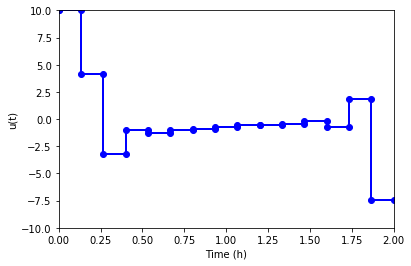

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.586284011472356
            Iterations: 213
            Function evaluations: 7344
            Gradient evaluations: 213


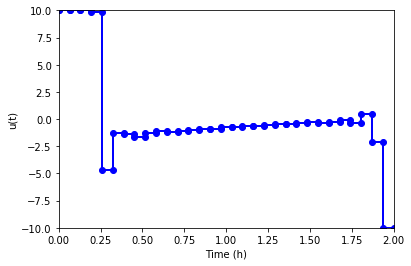

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.586013971925454
            Iterations: 201
            Function evaluations: 13370
            Gradient evaluations: 201


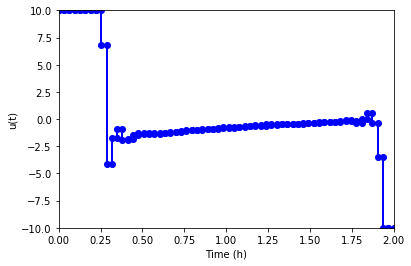

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.586018368971239
            Iterations: 5
            Function evaluations: 659
            Gradient evaluations: 5


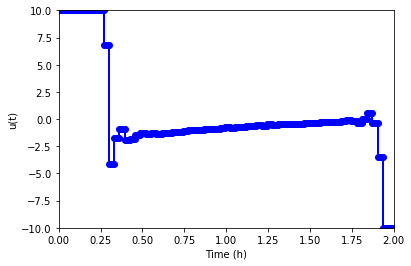

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.586020052682952
            Iterations: 2
            Function evaluations: 518
            Gradient evaluations: 2


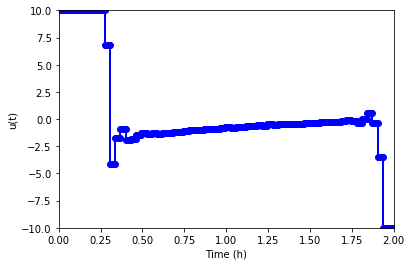

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.586020602476433
            Iterations: 2
            Function evaluations: 1039
            Gradient evaluations: 2


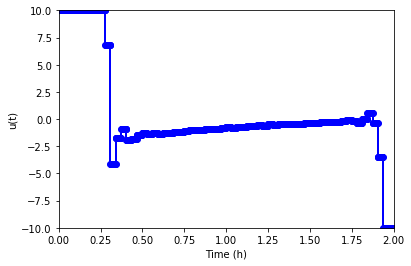

Text(0,0.5,'Iteration')

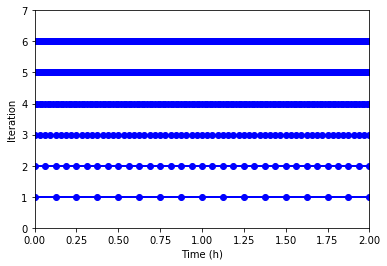

In [6]:
import numpy as np 
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt

ns=16
w0 = np.zeros(ns)
x10 = 1
x20 = 1
x30 = 0

inte=7
tg=[0]*inte
data2=[0]*inte

for i in range(1,inte):
    t = np.linspace(0,2,ns+1)

    def state(y,t,w):
        x1,x2,x3 = y
        f = [x2+w,
         -w,
         (x1**2)/2]
        return f
        
    def objective(w0):
        y0 = [x10,x20,x30]
        res=[];
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],2), args=(w0[ks],))
            y0=sol[-1]
        obj = sol[-1][2]
        return obj
    
    def constraint(w0):
        y0 = [x10,x20,x30]
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],20), args=(w0[ks],))
            y0=sol[-1]         
        return [sol[-1][0] - 0, sol[-1][1] - 0] 
    
    cons={'type':'eq','fun': constraint}

    res = minimize(objective,w0,method='SLSQP', jac=None, bounds=[(-10,10)]*ns, constraints=cons, tol=None, callback=None,options={'maxiter': 1000,'ftol': 1e-9,'disp':True})
    
    tg[i]=t
    data2[i] = np.ones(ns+1)*i

    #Plot u(t) vs tempo
    plt.figure(i)
    plt.step(np.linspace(0,2,ns),res.x,'bo',LineWidth=2)
    plt.axis([0, 2, -10, 10])
    plt.xlabel("Time (h)")
    plt.ylabel("u(t)")
    plt.show()
    
    w0=[]
    for o in range(0,ns): 
        w0.append(res.x[o])
        w0.append(res.x[o])
        
    ns=ns*2

plt.figure(i+1)
plt.plot( tg[1], data2[1], 'ko-',LineWidth=2)
plt.plot( tg[2], data2[2], 'ko-',LineWidth=2)
plt.plot( tg[3], data2[3], 'ko-',LineWidth=2)
plt.plot( tg[4], data2[4], 'ko-',LineWidth=2)
plt.plot( tg[5], data2[5], 'ko-',LineWidth=2)
plt.plot( tg[6], data2[6], 'ko-',LineWidth=2)

plt.axis([0, 2, 0, 7])
plt.xlabel("Time (h)")
plt.ylabel("Iteration")

2) Caso sem aplicação das wavelets com saída dos tempos

In [8]:
import numpy as np 
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import time
t0 = time.clock()
ns=16
x10 = 1
x20 = 1
x30 = 0
inte=7
tg=[0]*inte
data2=[0]*inte
w0 = np.zeros(ns)
for i in range(1,inte):
    t = np.linspace(0,2,ns+1)
    def state(y,t,w):
        x1,x2,x3 = y
        f = [x2+w,
         -w,
         (x1**2)/2]
        return f
    def objective(w0):
        y0 = [x10,x20,x30]
        res=[];
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],2), args=(w0[ks],))
            y0=sol[-1]
        obj = sol[-1][2]
        return obj
    def constraint(w0):       
        y0 = [x10,x20,x30]
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],20), args=(w0[ks],))
            y0=sol[-1]
        return [sol[-1][0] - 0, sol[-1][1] - 0]
    cons={'type':'eq','fun': constraint}
    res = minimize(objective,w0,method='SLSQP', jac=None, bounds=[(-10,10)]*ns, constraints=cons, tol=None, callback=None,options={'maxiter': 1000,'ftol': 1e-9,'disp':True})
    w0=[]
    for o in range(0,ns): 
        w0.append(res.x[o])
        w0.append(res.x[o])
    ns=ns*2
    print(time.clock()-t0)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.592356439866078
            Iterations: 96
            Function evaluations: 1794
            Gradient evaluations: 96
6.067549985477854
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.586284011472356
            Iterations: 213
            Function evaluations: 7344
            Gradient evaluations: 213
48.864147965753546
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.586013971925454
            Iterations: 201
            Function evaluations: 13370
            Gradient evaluations: 201
190.8171946445691
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.586018368971239
            Iterations: 5
            Function evaluations: 659
            Gradient evaluations: 5
204.19762506329334
Optimization terminated successfully.    (Exit mode 0)
            Current f

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.592356439866078
            Iterations: 96
            Function evaluations: 1794
            Gradient evaluations: 96


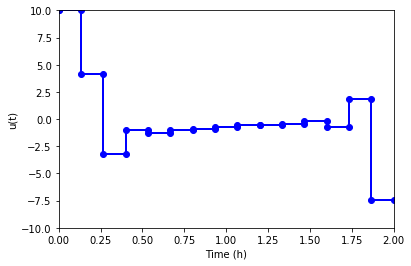

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.583601314316733
            Iterations: 126
            Function evaluations: 2551
            Gradient evaluations: 126


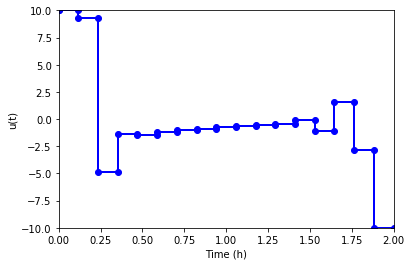

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.50159757790664
            Iterations: 289
            Function evaluations: 6558
            Gradient evaluations: 289


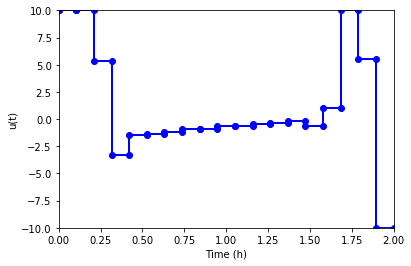

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.370967026399967
            Iterations: 87
            Function evaluations: 2100
            Gradient evaluations: 87


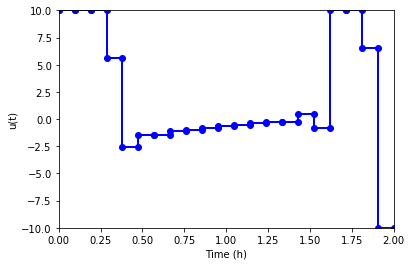

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.222825171875622
            Iterations: 127
            Function evaluations: 3335
            Gradient evaluations: 127


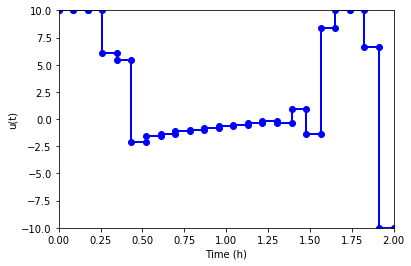

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.068767644269138
            Iterations: 171
            Function evaluations: 4856
            Gradient evaluations: 171


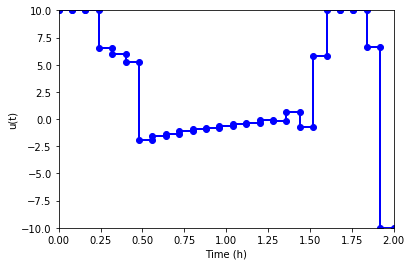

Text(0,0.5,'Iteration')

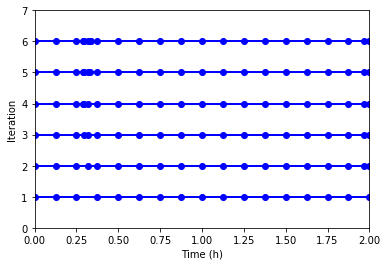

In [3]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pywt

ns=16
t = np.linspace(0,2,ns+1)
w0 = np.zeros(ns)
x10 = 1
x20 = 1
x30 = 0 

inte=7
tg=[0]*inte
data2=[0]*inte

for i in range(1,inte):
    
    def state(y,t,w):
        x1,x2,x3 = y
        f = [x2+w,
         -w,
         (x1**2)/2]
        return f
        
    def objective(w0):
        y0 = [x10,x20,x30]
        res=[];
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],2), args=(w0[ks],))
            y0=sol[-1]
        obj = sol[-1][2]
        return obj
    
    def constraint(w0):
        y0 = [x10,x20,x30]
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],20), args=(w0[ks],))
            y0=sol[-1]         
        return [sol[-1][0] - 0, sol[-1][1] - 0]
    
    cons={'type':'eq','fun': constraint}

    res = minimize(objective,w0,method='SLSQP', jac=None, bounds=[(-10,10)]*ns, constraints=cons, tol=None, callback=None,options={'maxiter':1000,'ftol': 1e-9,'disp':True})
    
    # Usei isso aqui somente para verificar a integração com o controle otimo
    y0 = [x10,x20,x30]
    for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],20), args=(w0[ks],))
            y0=sol[-1]
            
            
    db1 = pywt.Wavelet('db1')
    maxlevel=pywt.dwt_max_level(len(res.x), db1)
    # mesmo se eu não usar o dwt_max_level o wavedec já calcula no max de níveis possiveis
    
    cD = pywt.wavedec(res.x, db1,mode='symmetric',level=maxlevel)
    ## cD imprime os coeficientes aproximados e detalhados, o primeiro sempre é o aproximado
    ## O detalhado calculado no maximo nível [-1]
    ## Tem de tamanho a metade do numero de dados iniciais
    
    cX=[x for x in cD[-1] if x > np.mean(cD[-1])]
    indx = np.where(cD[-1]>np.mean(cD[-1]))
    z=0
    
    tg[i]=t
    data2[i] = np.ones(ns+1)*i
    
    for x in indx: 
        t=np.insert(t,x*2+z+1,(t[x*2+z]*0.77+t[x*2+z+1]*0.33))
        w0=np.insert(w0,x*2+z+1,w0[x*2+z])
        z=x+1
        
    
    #Plot u(t) vs tempo
    plt.figure(i)
    plt.step(np.linspace(0,2,ns),res.x,'bo',LineWidth=2)
    plt.axis([0, 2, -10, 10])
    plt.xlabel("Time (h)")
    plt.ylabel("u(t)")
    plt.show()
    
    #atualização do ns
    ns=len(t)-1
    
plt.figure(i+1)
plt.plot( tg[1], data2[1], 'bo-',LineWidth=2)
plt.plot( tg[2], data2[2], 'bo-',LineWidth=2)
plt.plot( tg[3], data2[3], 'bo-',LineWidth=2)
plt.plot( tg[4], data2[4], 'bo-',LineWidth=2)
plt.plot( tg[5], data2[5], 'bo-',LineWidth=2)
plt.plot( tg[6], data2[6], 'bo-',LineWidth=2)

plt.axis([0, 2, 0, 7])
plt.xlabel("Time (h)")
plt.ylabel("Iteration")

In [7]:
import numpy as np
from scipy.integrate import odeint # Integration
from scipy.optimize import minimize # Optimization
import matplotlib.pyplot as plt # Plotting
import pywt
import time

t0 = time.clock()
ns=16
# Initial Snowball Conditions
x10 = 1 # Initial mass
x20 = 1 # Initial velocity
x30 = 0 # Initial radius
t = np.linspace(0,2,ns+1)
w0 = np.zeros(ns)
inte=7
for i in range(1,inte):
    def state(y,t,w):
        x1,x2,x3 = y
        f = [x2+w,
         -w,
         (x1**2)/2]
        return f
    def objective(w0):
        y0 = [x10,x20,x30]
        res=[];
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],2), args=(w0[ks],))
            y0=sol[-1]
        obj = sol[-1][2]
        return obj
    def constraint(w0):
        y0 = [x10,x20,x30]
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],20), args=(w0[ks],))
            y0=sol[-1]
        return [sol[-1][0] - 0, sol[-1][1] - 0] 
    cons={'type':'eq','fun': constraint}
    res = minimize(objective,w0,method='SLSQP', jac=None, bounds=[(-10,10)]*ns, constraints=cons, tol=None, callback=None,options={'maxiter':1000,'ftol': 1e-9,'disp':True})
    y0 = [x10,x20,x30]
    w0 = res.x
    db1 = pywt.Wavelet('db1')
    maxlevel=pywt.dwt_max_level(len(res.x), db1)
    cD = pywt.wavedec(res.x, db1,mode='symmetric',level=maxlevel)
    cX=[x for x in cD[-1] if x > np.mean(cD[-1])]
    indx = np.where(cD[-1]>np.mean(cD[-1]))
    z=0
    
    tg[i]=t
    data2[i] = np.ones(ns+1)*i
    
    for x in indx: 
        t=np.insert(t,x*2+z+1,(t[x*2+z]*0.77+t[x*2+z+1]*0.33))
        w0=np.insert(w0,x*2+z+1,w0[x*2+z])
        z=x+1
    print(ns)
    ns=len(t)-1
    print(time.clock()-t0)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.592356439866078
            Iterations: 96
            Function evaluations: 1794
            Gradient evaluations: 96
16
5.5968791686691475
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.583601314316733
            Iterations: 126
            Function evaluations: 2551
            Gradient evaluations: 126
18
14.815297779537104
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.50159757790664
            Iterations: 289
            Function evaluations: 6558
            Gradient evaluations: 289
20
42.159810621929864
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.370967026399967
            Iterations: 87
            Function evaluations: 2100
            Gradient evaluations: 87
22
52.04293135044918
Optimization terminated successfully.    (Exit mode 0)
       

In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pywt

ns=16
t = np.linspace(0,2,ns+1)
w0 = np.zeros(ns)
x10 = 1
x20 = 1
x30 = 0 

inte=4
tg=[0]*inte
data2=[0]*inte

for i in range(1,inte):
    
    def state(y,t,w):
        x1,x2,x3 = y
        f = [x2+w,
         -w,
         (x1**2)/2]
        return f
        
    def objective(w):
        y0 = [x10,x20,x30]
        res=[];
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],2), args=(w[ks],))
            y0=sol[-1]
        obj = sol[-1][2]
        return obj
    
    def constraint(w):
        y0 = [x10,x20,x30]
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],2), args=(w[ks],))
            
            y0=sol[-1]         
        return [sol[-1][0] - 0, sol[-1][1] - 0]
    
    cons={'type':'eq','fun': constraint}

    res = minimize(objective,w0,method='SLSQP', jac=None, bounds=[(-10,10)]*ns, constraints=cons, tol=None, callback=None,options={'maxiter':100000,'ftol': 1e-12,'disp':True})
    
    # Usei isso aqui somente para verificar a integração com o controle otimo
    y0 = [x10,x20,x30]
    
    for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],20), args=(res.x[ks],))
            y0=sol[-1]
            print(sol[-1])
    db1 = pywt.Wavelet('db1')
    maxlevel=pywt.dwt_max_level(len(res.x), db1)
    # mesmo se eu não usar o dwt_max_level o wavedec já calcula no max de níveis possiveis
    
    cD = pywt.wavedec(res.x, db1,mode='symmetric',level=maxlevel)
    ## cD imprime os coeficientes aproximados e detalhados, o primeiro sempre é o aproximado
    ## O detalhado calculado no maximo nível [-1]
    ## Tem de tamanho a metade do numero de dados iniciais
    
    cX=[x for x in cD[-1] if x > np.mean(cD[-1])]
    indx = np.where(cD[-1]>np.mean(cD[-1]))
    print(indx)
    z=0
    
    tg[i]=t
    data2[i] = np.ones(ns+1)*i
    
    for x in indx: 
        t=np.insert(t,x+z+1,(t[x+z]*0.5+t[x+z+1]*0.5))
        t=np.insert(t,x*2+z+2,(t[x*2+z+1]*0.5+t[x*2+z+2]*0.5))
        w0=np.insert(w0,x+z+1,w0[x+z])
        w0=np.insert(w0,x*2+z+2,w0[x*2+z+1])
        
        z=x+1
        
    
    
    #Plot u(t) vs tempo
    plt.figure(i)
    plt.step(np.linspace(0,2,ns),res.x,'bo',LineWidth=2)
    plt.axis([0, 2, -10, 10])
    plt.xlabel("Time (h)")
    plt.ylabel("u(t)")
    plt.show()
    
    #atualização do ns
    ns=len(t)-1
    
plt.figure(i+1)
plt.plot( tg[1], data2[1], 'bo-',LineWidth=2)
plt.plot( tg[2], data2[2], 'bo-',LineWidth=2)
plt.plot( tg[3], data2[3], 'bo-',LineWidth=2)
# =============================================================================
# plt.plot( tg[4], data2[4], 'bo-',LineWidth=2)
# plt.plot( tg[5], data2[5], 'bo-',LineWidth=2)
# plt.plot( tg[6], data2[6], 'bo-',LineWidth=2)
# =============================================================================

plt.axis([0, 2, 0, 4])
plt.xlabel("Time (h)")
plt.ylabel("Iteration")

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.592356395409342
            Iterations: 212
            Function evaluations: 4047
            Gradient evaluations: 212
[ 2.296875   -0.25        0.18128969]
[ 3.4375     -1.5         0.70654297]
[ 3.73411813 -2.01639267  1.51304111]
[ 3.10800853 -1.61739479  2.24478646]
[ 2.79035978 -1.4942221   2.78844459]
[ 2.45270779 -1.33328957  3.21801675]
[ 2.16551082 -1.20471808  3.55130893]
[ 1.91161761 -1.09452772  3.81108619]
[ 1.68530124 -0.99906061  4.01328289]
[ 1.48913972 -0.92302973  4.17078042]
[ 1.31276744 -0.85796992  4.29349063]
[ 1.15638029 -0.80555294  4.38879446]
[ 1.03592517 -0.78447454  4.46393677]
[ 0.85178408 -0.69265396  4.51967936]
[ 0.98463349 -0.92671389  4.57274561]
[-7.69708707e-09  9.51114187e-14  4.59235644e+00]
(array([1, 7], dtype=int64),)


<Figure size 640x480 with 1 Axes>

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.589316540651128
            Iterations: 322
            Function evaluations: 7489
            Gradient evaluations: 322
[ 2.296875   -0.25        0.18128969]
[ 2.88671875 -0.875       0.3926425 ]
[ 3.4375     -1.5         0.70654296]
[ 3.91062539 -2.0851617   1.1296616 ]
[ 3.53808306 -1.83512843  1.56318293]
[ 3.13820825 -1.65327909  2.25967664]
[ 2.76593418 -1.47662396  2.80438998]
[ 2.44119292 -1.32711647  3.22809155]
[ 2.15489301 -1.19867876  3.55819678]
[ 2.02479516 -1.14171831  3.69468477]
[ 1.90182869 -1.08844442  3.81514605]
[ 1.67702012 -0.99377452  4.01531615]
[ 1.48223547 -0.91850749  4.1713104 ]
[ 1.3076623  -0.85476377  4.29297093]
[ 1.15214342 -0.80284546  4.38755498]
[ 1.01883141 -0.76769204  4.46124046]
[ 0.96641343 -0.76311167  4.49203679]
[ 0.83793117 -0.67971782  4.51749004]
[ 0.98371338 -0.9258479   4.56974239]
[-7.30223517e-09  1.79048616e-13  4.58931659e+00]
(array([8, 9],

<Figure size 640x480 with 1 Axes>

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.589308753493547
            Iterations: 714
            Function evaluations: 19391
            Gradient evaluations: 714
[ 2.296875   -0.25        0.18128969]
[ 2.88671875 -0.875       0.3926425 ]
[ 3.4375     -1.5         0.70654296]
[ 3.92163481 -2.09652626  1.1309687 ]
[ 3.53827045 -1.83605507  1.56580234]
[ 3.13727364 -1.65313248  2.26214028]
[ 2.76745725 -1.47907932  2.80696262]
[ 2.44033973 -1.32736454  3.23077373]
[ 2.29166717 -1.2595325   3.40571559]
[ 2.14924336 -1.19377453  3.55979646]
[ 2.08468249 -1.16608649  3.62982096]
[ 2.03522849 -1.15286611  3.69612535]
[ 1.89686256 -1.08441521  3.81692301]
[ 1.6776369  -0.9951632   4.01660694]
[ 1.48175965 -0.91891588  4.17261531]
[ 1.30731416 -0.8553628   4.29420417]
[ 1.14233632 -0.7934348   4.38800939]
[ 1.08283385 -0.78320224  4.42669748]
[ 1.02560812 -0.77465968  4.46143382]
[ 0.95741265 -0.7542424   4.49216089]
[ 0.90756547 -0.72754818 

<Figure size 640x480 with 1 Axes>

Text(0,0.5,'Iteration')

# ESSA AQUI :D

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.578038471312173
            Iterations: 95
            Function evaluations: 1730
            Gradient evaluations: 95
0.7815658373632285
16


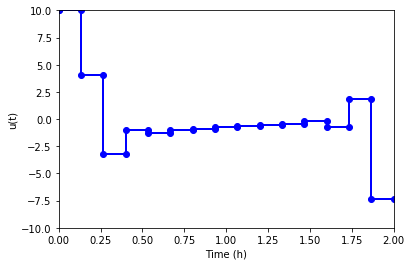

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.5752953895590665
            Iterations: 112
            Function evaluations: 2277
            Gradient evaluations: 112
0.0005995420010183393
18


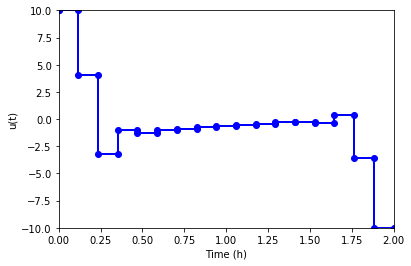

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.57506596910139
            Iterations: 162
            Function evaluations: 3957
            Gradient evaluations: 162
5.01458250495504e-05
22


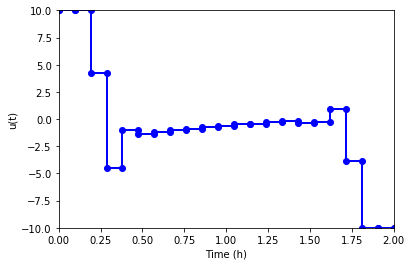

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.572802624780403
            Iterations: 295
            Function evaluations: 7814
            Gradient evaluations: 295
0.0004949577986860194
24


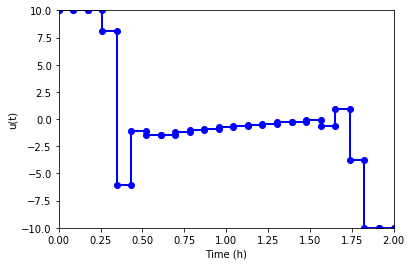

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.572721313490894
            Iterations: 332
            Function evaluations: 9408
            Gradient evaluations: 332
1.778181610777799e-05
26


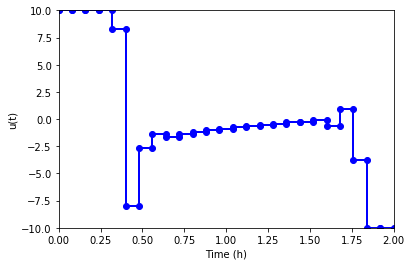

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.571850991070623
            Iterations: 286
            Function evaluations: 9314
            Gradient evaluations: 286
0.00019036543884975632
30


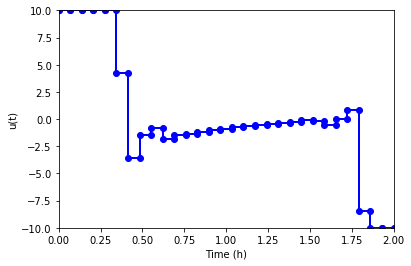

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.5718478758035435
            Iterations: 421
            Function evaluations: 15400
            Gradient evaluations: 421
6.81402173581437e-07
34


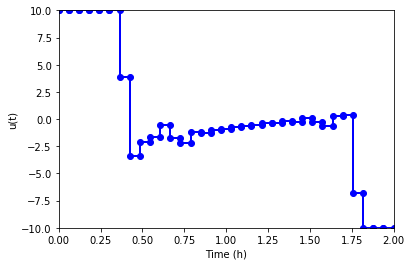

In [3]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pywt
import statistics

ns=16
t = np.linspace(0,2,ns+1)
w0 = np.zeros(ns)
x10 = 1
x20 = 1
x30 = 0 

i=0
fun=1
inte=10
tg=[0]*inte
data2=[0]*inte
err=1
tol=1e-6
while err>tol:
    i=i+1
    def state(y,t,w):
        x1,x2,x3 = y
        f = [x2+w,
         -w,
         (x1**2)/2]
        return f
    
    
        
    def objective(w0):
        y0 = [x10,x20,x30]
        res=[];
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],2), args=(w0[ks],))
            y0=sol[-1]
        obj = sol[-1][2]
        return obj
    
    def constraint(w0):
        y0 = [x10,x20,x30]
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],20), args=(w0[ks],))
            y0=sol[-1]         
        return [sol[-1][0] - 0.01, sol[-1][1] - 0.01]
    
    cons={'type':'eq','fun': constraint}

    res = minimize(objective,w0,method='SLSQP', jac=None, bounds=[(-10,10)]*ns, constraints=cons, tol=None, callback=None,options={'maxiter':100000000,'ftol': 1e-9,'disp':True})
    err=abs((res.fun-fun)/res.fun)
    print(err)
    fun=res.fun
    db1 = pywt.Wavelet('db1')
    maxlevel=pywt.dwt_max_level(len(res.x), db1)
    # mesmo se eu não usar o dwt_max_level o wavedec já calcula no max de níveis possiveis
    
    cD = pywt.wavedec(res.x, db1,mode='symmetric',level=maxlevel)
    ## cD imprime os coeficientes aproximados e detalhados, o primeiro sempre é o aproximado
    ## O detalhado calculado no maximo nível [-1]
    ## Tem de tamanho a metade do numero de dados iniciais
    
    #a=[]
    #for x in range(len(cD[-1])):
    #    a.append(cD[-1][x])
    #for x in range(len(cD[-2])):
    #    a.append(cD[-2][x])
    
    Cdvr=statistics.pstdev(cD[-1])
    Thr=Cdvr*(2*np.log(len(cD[-1])))**(1/2)
    
    #cX=[x for x in abs(cD[-1]) if x > abs(Thr)]
    indx = np.where(abs(cD[-1])>abs(Thr))
    z=0
    for x in range(len(indx[0])):
        if indx[0][x]==0:
            print(x)
            t=np.insert(t,indx[0][x]*2+z+2,(t[indx[0][x]*2+z+1]*0.6+t[indx[0][x]*2+z+2]*0.4))
            w0=np.insert(w0,indx[0][x]*2+z+2,w0[indx[0][x]*2+z+1])
            z=z+1
        elif indx[0][x]==len(cD[-1]):
            t=np.insert(t,indx[0][x]*2+z-1,(t[indx[0][x]*2+z-2]*0.6+t[indx[0][x]*2+z-1]*0.4))
            w0=np.insert(w0,indx[0][x]*2+z-1,w0[indx[0][x]*2+z-2])
            z=z+1
        
        else:
            t=np.insert(t,indx[0][x]*2+z,(t[indx[0][x]*2+z-1]*0.6+t[indx[0][x]*2+z]*0.4))
            w0=np.insert(w0,indx[0][x]*2+z,w0[indx[0][x]*2+z-1])
            z=z+1
        
            t=np.insert(t,indx[0][x]*2+z+2,(t[indx[0][x]*2+z+1]*0.4+t[indx[0][x]*2+z+2]*0.6))
            w0=np.insert(w0,indx[0][x]*2+z+2,w0[indx[0][x]*2+z+1])
            z=z+1
        
    
    # Usei isso aqui somente para verificar a integração com o controle otimo
    y0 = [x10,x20,x30]
    for ks in range(ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],20), args=(w0[ks],))
            y0=sol[-1]
    print(ns)
    #Plot u(t) vs tempo
    plt.figure(i)
    plt.step(np.linspace(0,2,ns),res.x,'bo',LineWidth=2)
    plt.axis([0, 2, -10, 10])
    plt.xlabel("Time (h)")
    plt.ylabel("u(t)")
    plt.show()
    
    #atualização do ns
    ns=len(t)-1
    

# haar/db1

In [53]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pywt
import statistics
import time
t0 = time.clock()

ns=16
t = np.linspace(0,2,ns+1)
w0 = np.zeros(ns)
x10 = 1
x20 = 1
x30 = 0 

inte=5
tg=[0]*inte
data2=[0]*inte

for i in range(1,inte):
    
    def state(y,t,w):
        x1,x2,x3 = y
        f = [x2+w,
         -w,
         (x1**2)/2]
        return f
    
    
        
    def objective(w0):
        y0 = [x10,x20,x30]
        res=[];
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],2), args=(w0[ks],))
            y0=sol[-1]
        obj = sol[-1][2]
        return obj
    
    def constraint(w0):
        y0 = [x10,x20,x30]
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],20), args=(w0[ks],))
            y0=sol[-1]         
        return [sol[-1][0] - 0.01, sol[-1][1] - 0.01]
    
    cons={'type':'eq','fun': constraint}

    res = minimize(objective,w0,method='SLSQP', jac=None, bounds=[(-10,10)]*ns, constraints=cons, tol=None, callback=None,options={'maxiter':100000000,'ftol': 1e-9,'disp':True})
    
    db1 = pywt.Wavelet('db1')
    maxlevel=pywt.dwt_max_level(len(res.x), db1)
    # mesmo se eu não usar o dwt_max_level o wavedec já calcula no max de níveis possiveis
    
    cD = pywt.wavedec(res.x, db1,mode='symmetric',level=maxlevel)
    ## cD imprime os coeficientes aproximados e detalhados, o primeiro sempre é o aproximado
    ## O detalhado calculado no maximo nível [-1]
    ## Tem de tamanho a metade do numero de dados iniciais
    
    ##Calculo da entropia de shannon
    sumsh=0
    for sh in range(len(cD[-1])):
        sumsh=sumsh+cD[-1][sh]**2
    
    p=[]
    for shp in range(len(cD[-1])):
        p.append((cD[-1][shp]**2)/sumsh)
    print(p)
    
    Es=0
    for she in range(len(p)):
        if p[she]!=0:
            Es=Es-p[she]*np.log2(p[she])
    
    print(Es)
    
    Cdvr=statistics.pstdev(cD[-1])
    Thr=Cdvr*(2*np.log(len(cD[-1])))**(1/2)
    
    #cX=[x for x in abs(cD[-1]) if x > abs(Thr)]
    indx = np.where(abs(cD[-1])>abs(Thr))
    z=0
    
    for x in range(len(indx[0])):
        if indx[0][x]==0:
            print(x)
            t=np.insert(t,indx[0][x]*2+z+2,(t[indx[0][x]*2+z+1]*0.5+t[indx[0][x]*2+z+2]*0.5))
            w0=np.insert(w0,indx[0][x]*2+z+2,w0[indx[0][x]*2+z+1])
            z=z+1
        elif indx[0][x]==len(cD[-1]):
            t=np.insert(t,indx[0][x]*2+z-1,(t[indx[0][x]*2+z-2]*0.5+t[indx[0][x]*2+z-1]*0.5))
            w0=np.insert(w0,indx[0][x]*2+z-1,w0[indx[0][x]*2+z-2])
            z=z+1
        
        else:
            t=np.insert(t,indx[0][x]*2+z,(t[indx[0][x]*2+z-1]*0.5+t[indx[0][x]*2+z]*0.5))
            w0=np.insert(w0,indx[0][x]*2+z,w0[indx[0][x]*2+z-1])
            z=z+1
        
            t=np.insert(t,indx[0][x]*2+z+2,(t[indx[0][x]*2+z+1]*0.5+t[indx[0][x]*2+z+2]*0.5))
            w0=np.insert(w0,indx[0][x]*2+z+2,w0[indx[0][x]*2+z+1])
            z=z+1 
    
    # Usei isso aqui somente para verificar a integração com o controle otimo
    y0 = [x10,x20,x30]
    for ks in range(ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],20), args=(w0[ks],))
            y0=sol[-1]
    print(ns)

    #atualização do ns
    ns=len(t)-1
    print(time.clock()-t0)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.578038471312173
            Iterations: 95
            Function evaluations: 1730
            Gradient evaluations: 95
[0.0, 0.38436545609776673, 0.000627158557082661, 0.00014688026253814585, 0.000205088348138464, 9.618366141266728e-05, 0.0023424608781732253, 0.6122167721948881]
0.9963985494768827
16
7.663578733304348
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.575004777402678
            Iterations: 82
            Function evaluations: 1649
            Gradient evaluations: 82
[0.0, 0.44347496113356255, 0.0004960343915015535, 0.00013282799105783624, 0.00022633558141836658, 0.0001657345740904298, 6.21767732632886e-05, 0.0015080952166166095, 0.5539338343384893]
1.0192821415569318
18
15.491357693410464
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.574716018660767
            Iterations: 143
           

# dmey

In [54]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pywt
import statistics
import time
t0 = time.clock()

ns=16
t = np.linspace(0,2,ns+1)
w0 = np.zeros(ns)
x10 = 1
x20 = 1
x30 = 0 

inte=5
tg=[0]*inte
data2=[0]*inte

for i in range(1,inte):
    
    def state(y,t,w):
        x1,x2,x3 = y
        f = [x2+w,
         -w,
         (x1**2)/2]
        return f
    
    
        
    def objective(w0):
        y0 = [x10,x20,x30]
        res=[];
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],2), args=(w0[ks],))
            y0=sol[-1]
        obj = sol[-1][2]
        return obj
    
    def constraint(w0):
        y0 = [x10,x20,x30]
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],20), args=(w0[ks],))
            y0=sol[-1]         
        return [sol[-1][0] - 0.01, sol[-1][1] - 0.01]
    
    cons={'type':'eq','fun': constraint}

    res = minimize(objective,w0,method='SLSQP', jac=None, bounds=[(-10,10)]*ns, constraints=cons, tol=None, callback=None,options={'maxiter':100000000,'ftol': 1e-9,'disp':True})
    
    db1 = pywt.Wavelet('dmey')
    maxlevel=pywt.dwt_max_level(len(res.x), db1)
    # mesmo se eu não usar o dwt_max_level o wavedec já calcula no max de níveis possiveis
    
    cD = pywt.wavedec(res.x, db1,mode='symmetric',level=maxlevel)
    ## cD imprime os coeficientes aproximados e detalhados, o primeiro sempre é o aproximado
    ## O detalhado calculado no maximo nível [-1]
    ## Tem de tamanho a metade do numero de dados iniciais
    
    ##Calculo da entropia de shannon
    sumsh=0
    for sh in range(len(cD[-1])):
        sumsh=sumsh+cD[-1][sh]**2
    
    p=[]
    for shp in range(len(cD[-1])):
        p.append((cD[-1][shp]**2)/sumsh)
    print(p)
    
    Es=0
    for she in range(len(p)):
        if p[she]!=0:
            Es=Es-p[she]*np.log2(p[she])
    
    print(Es)
    
    Cdvr=statistics.pstdev(cD[-1])
    Thr=Cdvr*(2*np.log(len(cD[-1])))**(1/2)*0.5
    
    #cX=[x for x in abs(cD[-1]) if x > abs(Thr)]
    indx = np.where(abs(cD[-1])>abs(Thr))
    z=0
    
    for x in range(len(indx[0])):
            t=np.insert(t,indx[0][x]+z+1,(t[indx[0][x]+z]*0.5+t[indx[0][x]+z+1]*0.5))
            w0=np.insert(w0,indx[0][x]+z,w0[indx[0][x]+z])
            z=z+1
    
    # Usei isso aqui somente para verificar a integração com o controle otimo
    y0 = [x10,x20,x30]
    for ks in range(ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],20), args=(w0[ks],))
            y0=sol[-1]
    print(ns)

    #atualização do ns
    ns=len(t)-1
    print(time.clock()-t0)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.578038471312173
            Iterations: 95
            Function evaluations: 1730
            Gradient evaluations: 95
[0.3449473353025531, 0.3449473353025531, 0.0568085870362288, 0.03489399155154892, 0.003399492356038055, 0.005696996841658194, 0.0036743726817595195, 0.0027358898420122516, 0.0020503743658595113, 0.0012574486519685878, 0.001016247395530758, 0.0006326873656103592, 0.00010971212365889134, 0.0019065337246628178, 0.01146453755596731, 0.18445845790238966]
2.176365741398586
16
5.718448538385928
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.575002890566404
            Iterations: 120
            Function evaluations: 2537
            Gradient evaluations: 120
[0.18649664743573138, 0.18649664743573138, 0.18649664743573138, 0.18649664743573138, 0.030738467019499387, 0.018935964991602255, 0.0017530995516035295, 0.003282603099479651, 0.0018446

# sym2

In [55]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pywt
import statistics
import time
t0 = time.clock()

ns=16
t = np.linspace(0,2,ns+1)
w0 = np.zeros(ns)
x10 = 1
x20 = 1
x30 = 0 

inte=5
tg=[0]*inte
data2=[0]*inte

for i in range(1,inte):
    
    def state(y,t,w):
        x1,x2,x3 = y
        f = [x2+w,
         -w,
         (x1**2)/2]
        return f
    
    
        
    def objective(w0):
        y0 = [x10,x20,x30]
        res=[];
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],2), args=(w0[ks],))
            y0=sol[-1]
        obj = sol[-1][2]
        return obj
    
    def constraint(w0):
        y0 = [x10,x20,x30]
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],20), args=(w0[ks],))
            y0=sol[-1]         
        return [sol[-1][0] - 0.01, sol[-1][1] - 0.01]
    
    cons={'type':'eq','fun': constraint}

    res = minimize(objective,w0,method='SLSQP', jac=None, bounds=[(-10,10)]*ns, constraints=cons, tol=None, callback=None,options={'maxiter':100000000,'ftol': 1e-9,'disp':True})
    
    db1 = pywt.Wavelet('sym2')
    maxlevel=pywt.dwt_max_level(len(res.x), db1)
    # mesmo se eu não usar o dwt_max_level o wavedec já calcula no max de níveis possiveis
    
    cD = pywt.wavedec(res.x, db1,mode='symmetric',level=maxlevel)
    ## cD imprime os coeficientes aproximados e detalhados, o primeiro sempre é o aproximado
    ## O detalhado calculado no maximo nível [-1]
    ## Tem de tamanho a metade do numero de dados iniciais
    
    ##Calculo da entropia de shannon
    sumsh=0
    for sh in range(len(cD[-1])):
        sumsh=sumsh+cD[-1][sh]**2
    
    p=[]
    for shp in range(len(cD[-1])):
        p.append((cD[-1][shp]**2)/sumsh)
    print(p)
    
    Es=0
    for she in range(len(p)):
        if p[she]!=0:
            Es=Es-p[she]*np.log2(p[she])
    
    print(Es)
    
    Cdvr=statistics.pstdev(cD[-1])
    Thr=Cdvr*(2*np.log(len(cD[-1])))**(1/2)*0.5
    
    #cX=[x for x in abs(cD[-1]) if x > abs(Thr)]
    indx = np.where(abs(cD[-1])>abs(Thr))
    z=0
    
    for x in range(len(indx[0])):
        if indx[0][x]==0:
            print(x)
            t=np.insert(t,indx[0][x]*2+z+2,(t[indx[0][x]*2+z+1]*0.5+t[indx[0][x]*2+z+2]*0.5))
            w0=np.insert(w0,indx[0][x]*2+z+2,w0[indx[0][x]*2+z+1])
            z=z+1
        elif indx[0][x]!=len(cD[-1]):
            t=np.insert(t,indx[0][x]*2+z,(t[indx[0][x]*2+z-1]*0.5+t[indx[0][x]*2+z]*0.5))
            w0=np.insert(w0,indx[0][x]*2+z,w0[indx[0][x]*2+z-1])
            z=z+1
        
            t=np.insert(t,indx[0][x]*2+z,(t[indx[0][x]*2+z-1]*0.5+t[indx[0][x]*2+z]*0.5))
            w0=np.insert(w0,indx[0][x]*2+z,w0[indx[0][x]*2+z-1])
            z=z+1 
    
    # Usei isso aqui somente para verificar a integração com o controle otimo
    y0 = [x10,x20,x30]
    for ks in range(ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],20), args=(w0[ks],))
            y0=sol[-1]
    print(ns)

    #atualização do ns
    ns=len(t)-1
    print(time.clock()-t0)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.578038471312173
            Iterations: 95
            Function evaluations: 1730
            Gradient evaluations: 95
[5.180274235727311e-32, 0.031960166268242704, 7.971329752050615e-06, 4.5873357812316485e-06, 6.670131561557094e-06, 2.4048179027111923e-06, 0.0023222442961138273, 0.4518824339205464, 0.5138135219000994]
1.1909214567450028
16
5.964674597519661
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.57500796488364
            Iterations: 107
            Function evaluations: 2371
            Gradient evaluations: 107
[2.4213735445636522e-31, 0.13336369330294154, 0.0005686710948544324, 0.00018572992899215364, 0.00017544021893158758, 0.0005543222370875946, 0.0017206310697876503, 6.731289375291443e-06, 0.11499134387960618, 0.7484334369784236, 3.405056547042636e-32]
1.0918681571371653
20
15.263081435696222
Optimization terminated successfully.    

# db2

In [56]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pywt
import statistics
import time
t0 = time.clock()

ns=16
t = np.linspace(0,2,ns+1)
w0 = np.zeros(ns)
x10 = 1
x20 = 1
x30 = 0 

inte=10
tg=[0]*inte
data2=[0]*inte

for i in range(1,inte):
    
    def state(y,t,w):
        x1,x2,x3 = y
        f = [x2+w,
         -w,
         (x1**2)/2]
        return f
    
    
        
    def objective(w0):
        y0 = [x10,x20,x30]
        res=[];
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],2), args=(w0[ks],))
            y0=sol[-1]
        obj = sol[-1][2]
        return obj
    
    def constraint(w0):
        y0 = [x10,x20,x30]
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],20), args=(w0[ks],))
            y0=sol[-1]         
        return [sol[-1][0] - 0.01, sol[-1][1] - 0.01]
    
    cons={'type':'eq','fun': constraint}

    res = minimize(objective,w0,method='SLSQP', jac=None, bounds=[(-10,10)]*ns, constraints=cons, tol=None, callback=None,options={'maxiter':100000000,'ftol': 1e-9,'disp':True})
    
    db1 = pywt.Wavelet('db2')
    maxlevel=pywt.dwt_max_level(len(res.x), db1)
    # mesmo se eu não usar o dwt_max_level o wavedec já calcula no max de níveis possiveis
    
    cD = pywt.wavedec(res.x, db1,mode='symmetric',level=maxlevel)
    ## cD imprime os coeficientes aproximados e detalhados, o primeiro sempre é o aproximado
    ## O detalhado calculado no maximo nível [-1]
    ## Tem de tamanho a metade do numero de dados iniciais
    
    ##Calculo da entropia de shannon
    sumsh=0
    for sh in range(len(cD[-1])):
        sumsh=sumsh+cD[-1][sh]**2
    
    p=[]
    for shp in range(len(cD[-1])):
        p.append((cD[-1][shp]**2)/sumsh)
    print(p)
    
    Es=0
    for she in range(len(p)):
        if p[she]!=0:
            Es=Es-p[she]*np.log2(p[she])
    
    print(Es)
    
    Cdvr=statistics.pstdev(cD[-1])
    Thr=Cdvr*(2*np.log(len(cD[-1])))**(1/2)*0.5
    
    #cX=[x for x in abs(cD[-1]) if x > abs(Thr)]
    indx = np.where(abs(cD[-1])>abs(Thr))
    z=0
    
    for x in range(1,len(indx[0])):
        if indx[0][x]==0:
            print(x)
            t=np.insert(t,indx[0][x]*2+z+2,(t[indx[0][x]*2+z+1]*0.5+t[indx[0][x]*2+z+2]*0.5))
            w0=np.insert(w0,indx[0][x]*2+z+2,w0[indx[0][x]*2+z+1])
            z=z+1
        elif indx[0][x]!=len(cD[-1]):
            t=np.insert(t,indx[0][x]*2+z,(t[indx[0][x]*2+z-1]*0.5+t[indx[0][x]*2+z]*0.5))
            w0=np.insert(w0,indx[0][x]*2+z,w0[indx[0][x]*2+z-1])
            z=z+1
        
            t=np.insert(t,indx[0][x]*2+z,(t[indx[0][x]*2+z-1]*0.5+t[indx[0][x]*2+z]*0.5))
            w0=np.insert(w0,indx[0][x]*2+z,w0[indx[0][x]*2+z-1])
            z=z+1 
    
    # Usei isso aqui somente para verificar a integração com o controle otimo
    y0 = [x10,x20,x30]
    for ks in range(ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],20), args=(w0[ks],))
            y0=sol[-1]
    print(ns)

    #atualização do ns
    ns=len(t)-1
    print(time.clock()-t0)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.578038471312173
            Iterations: 95
            Function evaluations: 1730
            Gradient evaluations: 95
[1.295068558931747e-32, 0.03196016626805419, 7.971329753074664e-06, 4.587335781204918e-06, 6.670131561468487e-06, 2.4048179026694438e-06, 0.0023222442961145996, 0.4518824339204584, 0.5138135219003743]
1.1909214567442508
16
5.917302296698836
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.575004261429625
            Iterations: 101
            Function evaluations: 2038
            Gradient evaluations: 101
[6.173219903304688e-32, 0.14174598885506673, 0.0001679990139649546, 0.00022355505970179067, 0.00036055415073222685, 0.0003590366811130573, 0.0007237188678212352, 0.09319851846666062, 0.7632206289049395, 3.1251925760479983e-31]
1.036722728722455
18
13.57129954341508
Optimization terminated successfully.    (Exit mode 0)
            

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.578038471312173
            Iterations: 95
            Function evaluations: 1730
            Gradient evaluations: 95
0.7815658373632285
16


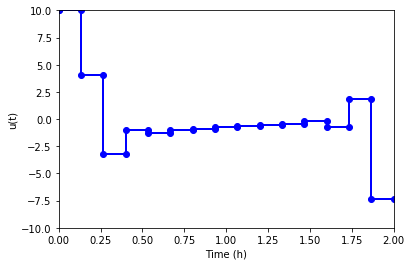

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.578024056701459
            Iterations: 93
            Function evaluations: 1878
            Gradient evaluations: 93
3.148653335021567e-06
18


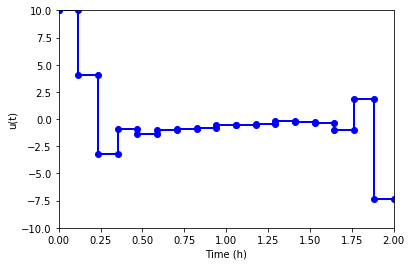

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.5780098184751825
            Iterations: 151
            Function evaluations: 3674
            Gradient evaluations: 151
3.1101344996595316e-06
22


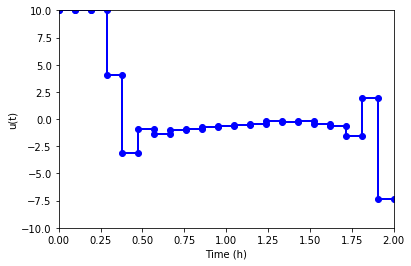

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.578011167306627
            Iterations: 181
            Function evaluations: 5224
            Gradient evaluations: 181
2.9463262440053374e-07
26


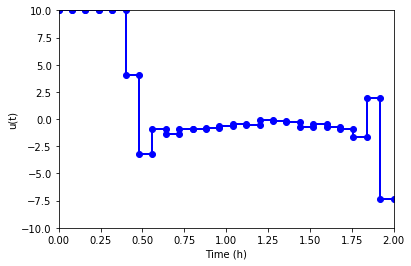

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.57802253563482
            Iterations: 228
            Function evaluations: 7482
            Gradient evaluations: 228
2.4832398932303205e-06
30


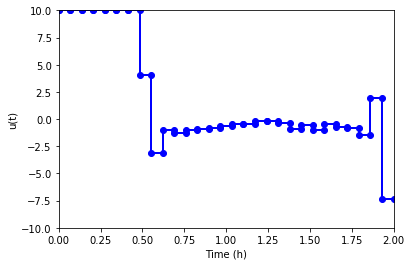

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.578016270551904
            Iterations: 310
            Function evaluations: 11349
            Gradient evaluations: 309
1.3685147769938593e-06
34


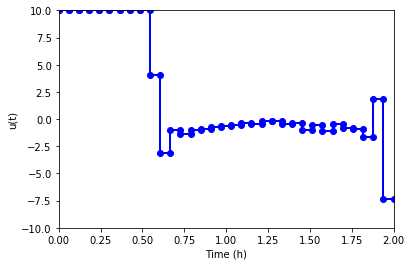

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.578045494021364
            Iterations: 169
            Function evaluations: 6786
            Gradient evaluations: 169
6.383394288589405e-06
38


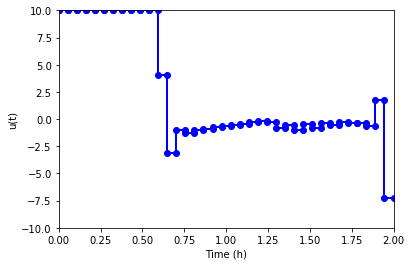

KeyboardInterrupt: 

In [2]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pywt
import statistics

ns=16
t = np.linspace(0,2,ns+1)
w0 = np.zeros(ns)
x10 = 1
x20 = 1
x30 = 0 

i=0
fun=1
inte=10
tg=[0]*inte
data2=[0]*inte
err=1
tol=1e-6
while err>tol:
    i=i+1
    def state(y,t,w):
        x1,x2,x3 = y
        f = [x2+w,
         -w,
         (x1**2)/2]
        return f
    
    
        
    def objective(w0):
        y0 = [x10,x20,x30]
        res=[];
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],2), args=(w0[ks],))
            y0=sol[-1]
        obj = sol[-1][2]
        return obj
    
    def constraint(w0):
        y0 = [x10,x20,x30]
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],20), args=(w0[ks],))
            y0=sol[-1]         
        return [sol[-1][0] - 0.01, sol[-1][1] - 0.01]
    
    cons={'type':'eq','fun': constraint}

    res = minimize(objective,w0,method='SLSQP', jac=None, bounds=[(-10,10)]*ns, constraints=cons, tol=None, callback=None,options={'maxiter':100000000,'ftol': 1e-9,'disp':True})
    err=abs((res.fun-fun)/res.fun)
    print(err)
    fun=res.fun
    db1 = pywt.Wavelet('db1')
    maxlevel=pywt.dwt_max_level(len(res.x), db1)
    # mesmo se eu não usar o dwt_max_level o wavedec já calcula no max de níveis possiveis
    
    cD = pywt.wavedec(res.x, db1,mode='symmetric',level=maxlevel)
    ## cD imprime os coeficientes aproximados e detalhados, o primeiro sempre é o aproximado
    ## O detalhado calculado no maximo nível [-1]
    ## Tem de tamanho a metade do numero de dados iniciais
    
    #a=[]
    #for x in range(len(cD[-1])):
    #    a.append(cD[-1][x])
    #for x in range(len(cD[-2])):
    #    a.append(cD[-2][x])
    
    Cdvr=statistics.pstdev(cD[-1])
    Thr=Cdvr*(2*np.log(len(cD[-1])))**(1/2)
    
    #cX=[x for x in abs(cD[-1]) if x > abs(Thr)]
    indx = np.where(abs(cD[-1])>abs(Thr))
    z=0
    for x in range(len(indx[0]),0,-1):
        x=x-1
        if indx[0][x]!=0:
            t=np.insert(t,indx[0][x]*2,(t[indx[0][x]*2-1]*0.6+t[indx[0][x]*2]*0.4))
            w0=np.insert(w0,indx[0][x]*2,w0[indx[0][x]*2-1])
            t=np.insert(t,indx[0][x]*2-1,(t[indx[0][x]*2-2]*0.6+t[indx[0][x]*2-1]*0.4))
            w0=np.insert(w0,indx[0][x]*2-1,w0[indx[0][x]*2+z-2])
        
        else:
            t=np.insert(t,indx[0][x]*2+1,(t[indx[0][x]*2]*0.6+t[indx[0][x]*2+1]*0.4))
            w0=np.insert(w0,indx[0][x]*2+1,w0[indx[0][x]*2])
        
    
    # Usei isso aqui somente para verificar a integração com o controle otimo
    y0 = [x10,x20,x30]
    for ks in range(ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],20), args=(w0[ks],))
            y0=sol[-1]
    print(ns)
    #Plot u(t) vs tempo
    plt.figure(i)
    plt.step(np.linspace(0,2,ns),res.x,'bo',LineWidth=2)
    plt.axis([0, 2, -10, 10])
    plt.xlabel("Time (h)")
    plt.ylabel("u(t)")
    plt.show()
    
    #atualização do ns
    ns=len(t)-1
    